## Hierarchical clustering

Hierarchical clustering is a type of unsupervised machine learning algorithm used to group similar objects into clusters. It builds a hierarchy of clusters that can be represented in a tree-like structure called a dendrogram. There are two main types of hierarchical clustering: agglomerative (bottom-up) and divisive (top-down). Let's explore these in detail:

## Agglomerative Hierarchical Clustering (Bottom-Up)
How It Works:

1. Start with Each Data Point as a Single Cluster:

2. Initially, each data point is considered as its own cluster.

3. Merge the Closest Clusters:

4. At each step, the two closest clusters are merged into a single cluster.

5. Repeat Until One Cluster Remains:

6. This process is repeated until all data points are merged into a single cluster or a predefined number of clusters is reached.

## Divisive Hierarchical Clustering (Top-Down)
How It Works:

1. Start with All Data Points in One Cluster:

2. Initially, all data points are considered as a single cluster.

3. Split the Cluster into Two:

4. At each step, the most dissimilar cluster is split into two clusters.

5. Repeat Until Each Data Point is Its Own Cluster:

6. This process is repeated until each data point is in its own cluster or a predefined number of clusters is reached.

## Linkage Criteria
When merging or splitting clusters, different linkage criteria can be used to determine the distance between clusters:

1. Single Linkage: The minimum distance between any single data point in one cluster and any single data point in the other cluster.

2. Complete Linkage: The maximum distance between any single data point in one cluster and any single data point in the other cluster.

3. Average Linkage: The average distance between all pairs of data points in the two clusters.

4. Ward's Linkage: The increase in the sum of squared differences within clusters when merging two clusters.

## Interpretation
## Dendrogram:

A dendrogram is a tree-like diagram that shows the arrangement of clusters produced by hierarchical clustering.

The x-axis represents the individual data points, and the y-axis represents the distance or dissimilarity between clusters.

By cutting the dendrogram at a specific height, you can determine the number of clusters.

Cluster Labels:

The cluster labels indicate the cluster to which each data point belongs. Data points with the same label belong to the same cluster.

# Advantages of Hierarchical Clustering
Easy to Understand and Implement: The hierarchical structure is intuitive and easy to interpret.

No Need to Specify Number of Clusters: Unlike K-Means, hierarchical clustering does not require specifying the number of clusters in advance.

Dendrogram Provides Visual Insights: The dendrogram helps visualize the hierarchical relationships between data points.

# Limitations of Hierarchical Clustering
Computational Complexity: Hierarchical clustering can be computationally expensive for large datasets.

Sensitivity to Noise and Outliers: Outliers can significantly affect the clustering results.

Lack of Scalability: Hierarchical clustering is not scalable to very large datasets due to its computational complexity.

Summary
Hierarchical clustering is a powerful clustering technique that builds a hierarchy of clusters, which can be visualized using a dendrogram. It provides flexibility in choosing the number of clusters and helps understand the relationships between data points. However, it can be computationally expensive and sensitive to noise.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data
X, _ = make_blobs(n_samples=1000, centers=5, n_features=10, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data preprocessed and scaled.")

Data preprocessed and scaled.


In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist

# Different linkage methods and distance metrics
linkage_methods = ['single', 'complete', 'average', 'ward']
distance_metrics = ['euclidean', 'manhattan', 'cosine']
# Function to perform hierarchical clustering and compute cophenetic correlation coefficient
def hierarchical_clustering(X, method, metric):
    Z = linkage(X, method=method)
    coph_corr, _ = cophenet(Z, pdist(X))
    return Z, coph_corr

# Evaluate different combinations of linkage methods and distance metrics
results = []
for method in linkage_methods:
    for metric in distance_metrics:
        Z, coph_corr = hierarchical_clustering(X_scaled, method, metric)
        results.append((method, metric, coph_corr))
        print(f'Method: {method}, Metric: {metric}, Cophenetic Correlation: {coph_corr}')

# Find the best combination based on cophenetic correlation coefficient
best_result = max(results, key=lambda x: x[2])
print(f'Best Method: {best_result[0]}, Best Metric: {best_result[1]}, Best Cophenetic Correlation: {best_result[2]}')


Method: single, Metric: euclidean, Cophenetic Correlation: 0.9141567280798137
Method: single, Metric: manhattan, Cophenetic Correlation: 0.9141567280798137
Method: single, Metric: cosine, Cophenetic Correlation: 0.9141567280798137
Method: complete, Metric: euclidean, Cophenetic Correlation: 0.9103563427964626
Method: complete, Metric: manhattan, Cophenetic Correlation: 0.9103563427964626
Method: complete, Metric: cosine, Cophenetic Correlation: 0.9103563427964626
Method: average, Metric: euclidean, Cophenetic Correlation: 0.9209266781261037
Method: average, Metric: manhattan, Cophenetic Correlation: 0.9209266781261037
Method: average, Metric: cosine, Cophenetic Correlation: 0.9209266781261037
Method: ward, Metric: euclidean, Cophenetic Correlation: 0.9088197759672163
Method: ward, Metric: manhattan, Cophenetic Correlation: 0.9088197759672163
Method: ward, Metric: cosine, Cophenetic Correlation: 0.9088197759672163
Best Method: average, Best Metric: euclidean, Best Cophenetic Correlation

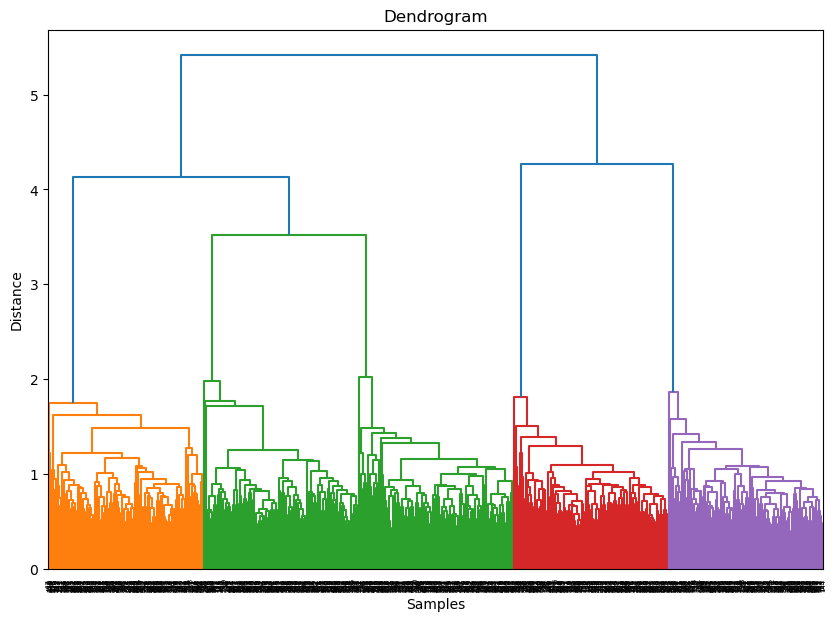

In [8]:
# Dendrogram analysis for the best combination
Z = linkage(X_scaled, method=best_result[0], metric=best_result[1])
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

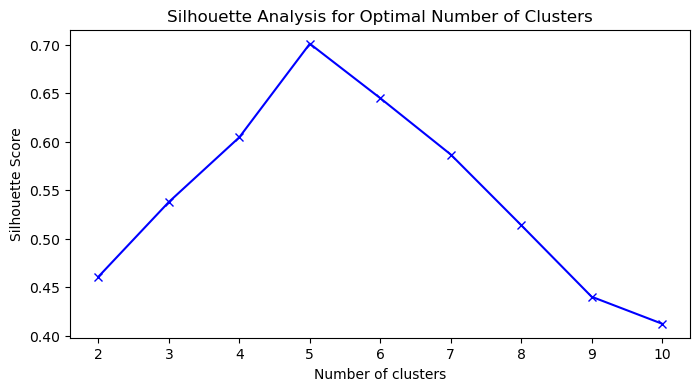

In [9]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Silhouette analysis
silhouette_scores = []
for n_clusters in range(2, 11):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage=best_result[0])
    cluster_labels = clusterer.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.show()

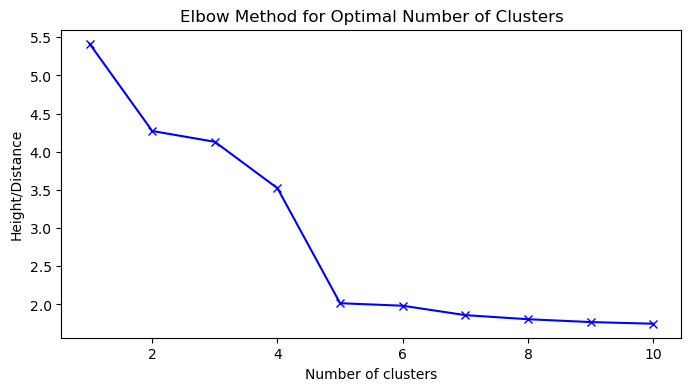

In [10]:
# Elbow Method with height/distance threshold
last = Z[-10:, 2]
last_rev = last[::-1]
indexes = np.arange(1, len(last) + 1)

plt.figure(figsize=(8, 4))
plt.plot(indexes, last_rev, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Height/Distance')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [11]:
from sklearn.metrics import adjusted_rand_score

# Cluster Stability Assessment
n_clusters = 5  # Assuming the optimal number of clusters found
stability_scores = []
for _ in range(10):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage=best_result[0])
    cluster_labels = clusterer.fit_predict(X_scaled)
    stability_scores.append(silhouette_score(X_scaled, cluster_labels))

print(f'Cluster Stability Scores: {stability_scores}')

Cluster Stability Scores: [0.7008034969822174, 0.7008034969822174, 0.7008034969822174, 0.7008034969822174, 0.7008034969822174, 0.7008034969822174, 0.7008034969822174, 0.7008034969822174, 0.7008034969822174, 0.7008034969822174]


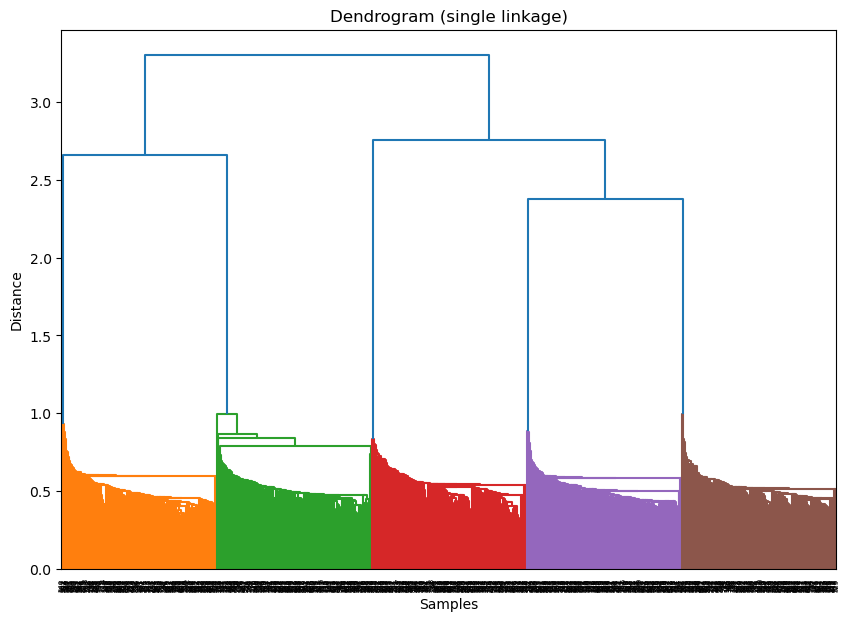

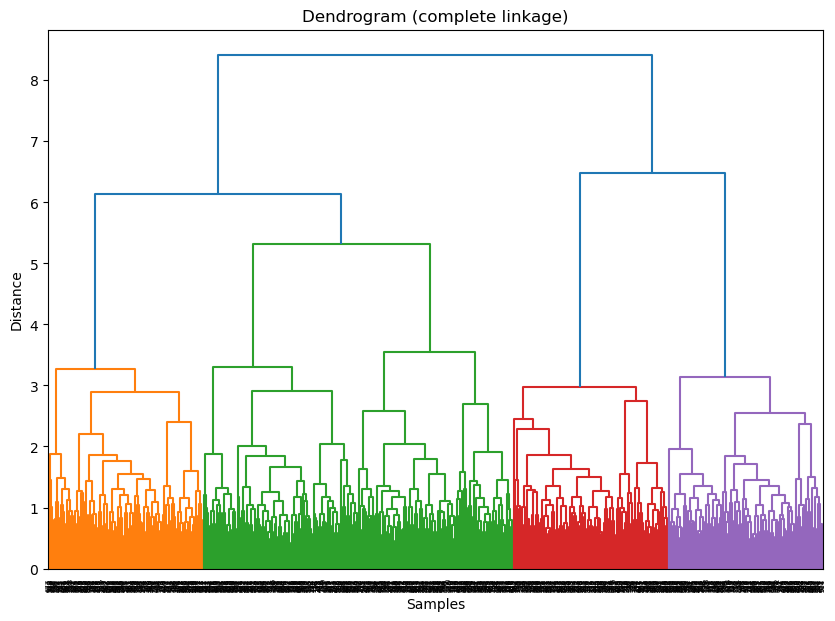

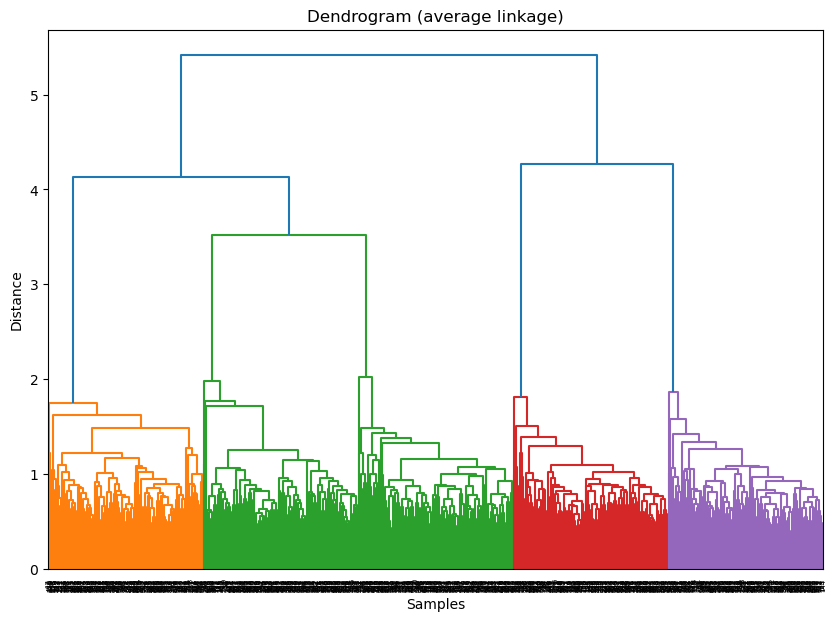

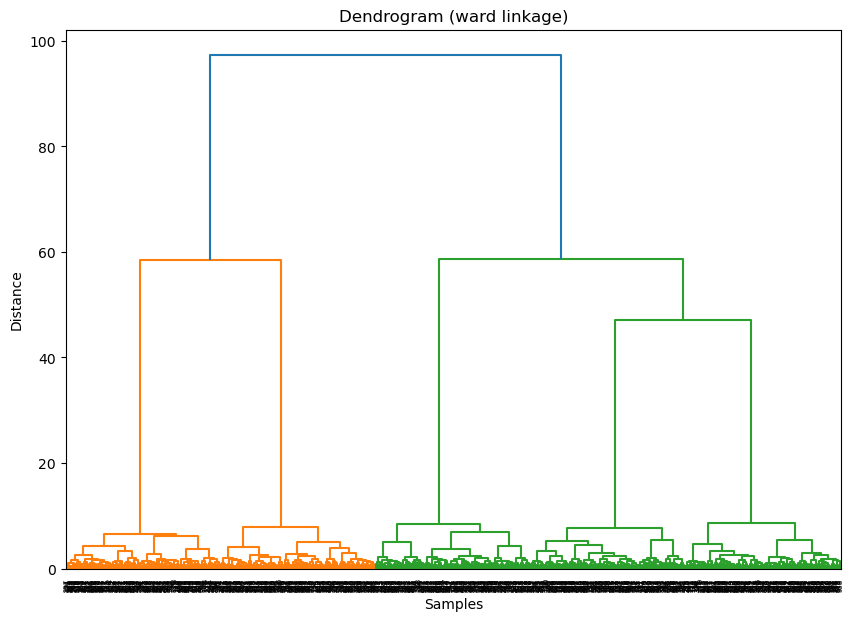

In [12]:
# Dendrogram for different configurations
for method in linkage_methods:
    Z = linkage(X_scaled, method=method, metric='euclidean')
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.title(f'Dendrogram ({method} linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

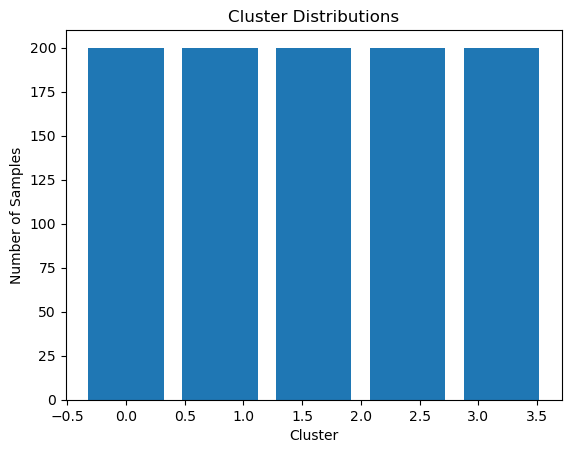

In [14]:
# Cluster Distributions
clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage=best_result[0])
labels = clusterer.fit_predict(X_scaled)
plt.hist(labels, bins=n_clusters, align='left', rwidth=0.8)
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.title('Cluster Distributions')
plt.show()

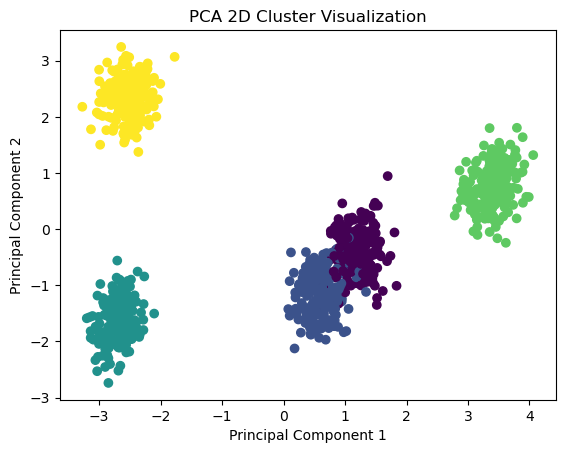

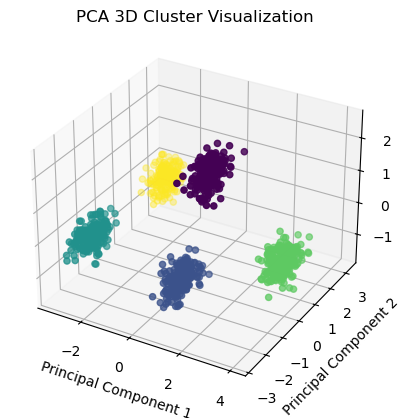

In [15]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# 2D Cluster Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA 2D Cluster Visualization')
plt.show()

# 3D Cluster Visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('PCA 3D Cluster Visualization')
plt.show()

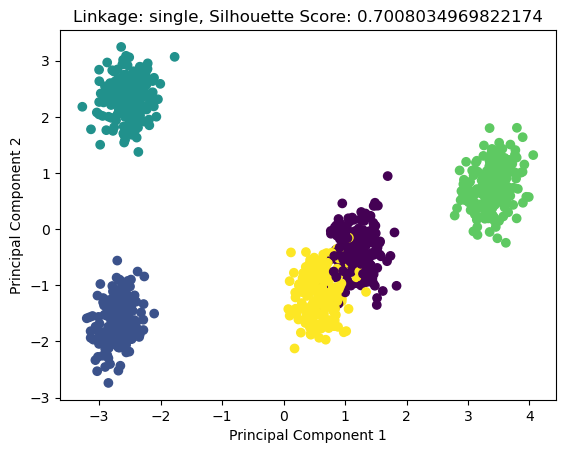

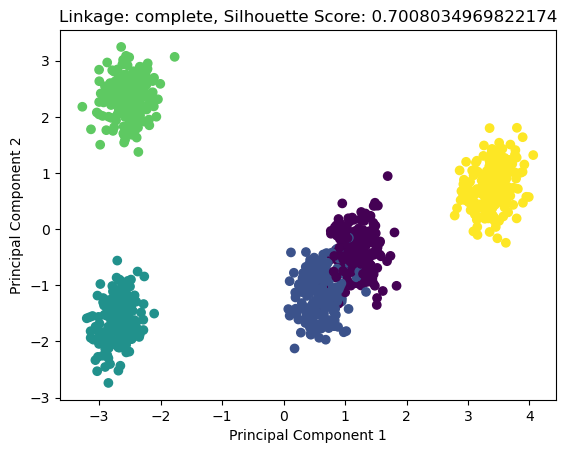

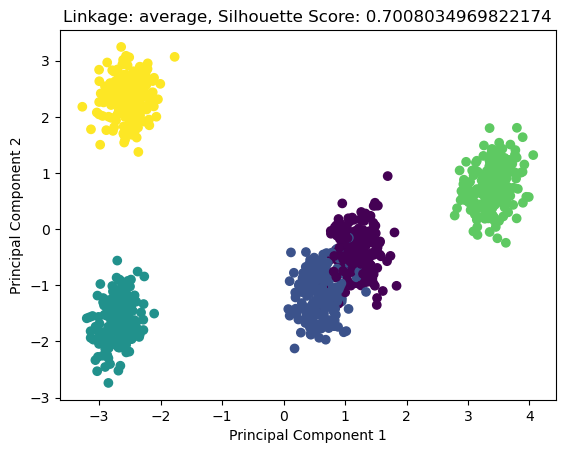

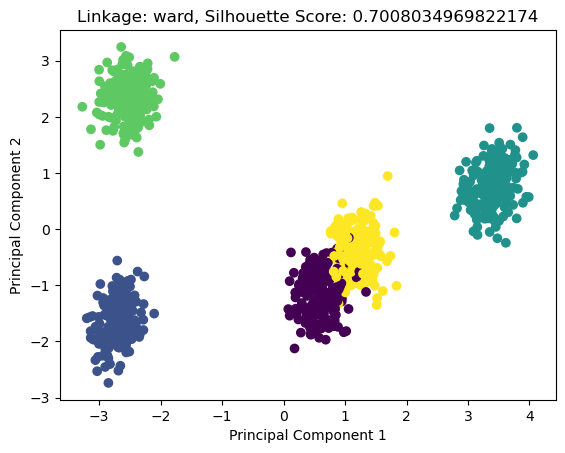

In [16]:
# Comparison Plots for Different Linkage Methods
for method in linkage_methods:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
    labels = clusterer.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
    plt.title(f'Linkage: {method}, Silhouette Score: {silhouette_avg}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

In [17]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Evaluation Metrics
silhouette = silhouette_score(X_scaled, labels)
ch_score = calinski_harabasz_score(X_scaled, labels)
db_score = davies_bouldin_score(X_scaled, labels)

print(f'Silhouette Score: {silhouette}')
print(f'Calinski-Harabasz Score: {ch_score}')
print(f'Davies-Bouldin Score: {db_score}')

Silhouette Score: 0.7008034969822174
Calinski-Harabasz Score: 3135.9669562641625
Davies-Bouldin Score: 0.43693694841879116
